In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [249]:
df = pd.read_csv("activityData.csv")
df

,Unnamed: 0,index,source,timestamp,values,activity
0,0,14889,heart_rate,49:01.9,"['65.0', '1']",Video games
1,1,14890,heart_rate,49:01.9,"['64.0', '1']",Video games
2,2,14891,heart_rate,49:01.9,"['64.0', '0']",Video games
3,3,14892,heart_rate,49:01.9,"['65.0', '0']",Video games
4,4,14893,heart_rate,49:01.9,"['64.0', '0']",Video games
...,...,...,...,...,...,...
56046,56046,137190,heart_rate,13:17.3,"['53.0', '1']",Video games
56047,56047,137191,heart_rate,13:17.3,"['52.0', '1']",Video games
56048,56048,137192,heart_rate,13:17.3,"['53.0', '1']",Video games
56049,56049,137193,heart_rate,13:17.3,"['54.0', '1']",Video games


In [250]:
df["value"] = 0
# for i in range(len(df["values"])):
#     df["value"][i] = 0
    

for i in range(len(df["values"])):
    f_occur= df["values"][i][2:].find("'") + 2
    df["value"][i] = df["values"][i][2:f_occur]

# df["values"][0][2:6]

C:\Users\admin\AppData\Local\Temp\ipykernel_10448\3399605942.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["value"][i] = df["values"][i][2:f_occur]


In [251]:
encoder = LabelEncoder()
encoder.fit(df["activity"])
encoded_y = encoder.transform(df["activity"])

df["encoded_y"] = encoded_y

target = pd.DataFrame({'activity':df['activity'].tolist(),'encoded_y':encoded_y}).drop_duplicates().sort_values(['encoded_y'],ascending=True)
target



,activity,encoded_y
20853,Cooking,0
8486,Eat,1
36840,Football,2
20489,In bus,3
4093,In computer,4
183,In vehicle,5
19854,Meeting,6
26441,Movie,7
30540,Pause,8
10240,Phone was out of the pocket (forgot),9


In [252]:
df1 = df[["value"]]

df1["val2"] = 1

C:\Users\admin\AppData\Local\Temp\ipykernel_10448\111900370.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["val2"] = 1


In [253]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df1)

c:\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [254]:
kmeans.cluster_centers_

array([[ 59.99876577,   1.        ],
       [ 71.01894532,   1.        ],
       [117.41315225,   1.        ],
       [ 85.39927703,   1.        ]])

In [255]:
label = kmeans.predict(df1)

In [256]:
k_labels = kmeans.labels_

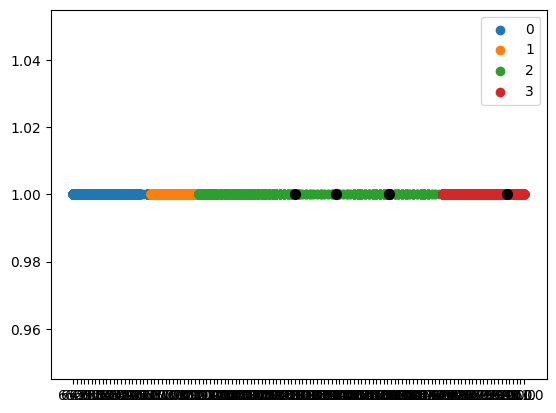

In [257]:
centroids = kmeans.cluster_centers_

df1 = np.array(df1)
u_labels = np.unique(k_labels)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df1[k_labels == i , 0] , df1[k_labels == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 50, color = 'k')
plt.legend()
plt.show()

[['65.0' 1]
 ['64.0' 1]
 ['64.0' 1]
 ...
 ['53.0' 1]
 ['54.0' 1]
 ['53.0' 1]]


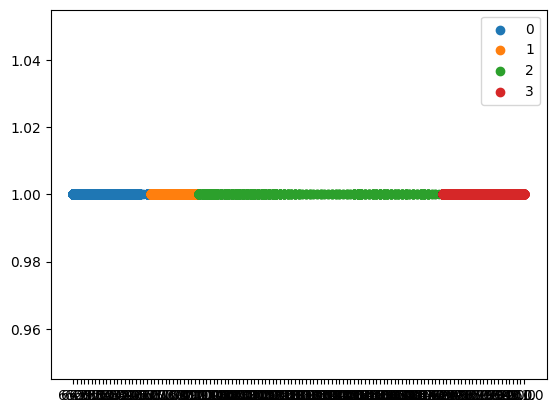

In [258]:
u_labels = np.unique(k_labels)

df1 = np.array(df1)

print(df1)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df1[k_labels == i , 0] , df1[k_labels == i , 1] , label = i)
plt.legend()
plt.show()

In [266]:
df["k_means"] = k_labels 

actt = np.unique(df["encoded_y"])

u_act = [{0: 0,1 :0, 2: 0, 3:0},{0: 0,1 :0, 2: 0, 3:0},{0: 0,1 :0, 2: 0, 3:0},{0: 0,1 :0, 2: 0, 3:0},{0: 0,1 :0, 2: 0, 3:0},{0: 0,1 :0, 2: 0, 3:0},{0: 0,1 :0, 2: 0, 3:0},{0: 0,1 :0, 2: 0, 3:0},{0: 0,1 :0, 2: 0, 3:0},{0: 0,1 :0, 2: 0, 3:0},{0: 0,1 :0, 2: 0, 3:0},{0: 0,1 :0, 2: 0, 3:0},{0: 0,1 :0, 2: 0, 3:0},{0: 0,1 :0, 2: 0, 3:0},{0: 0,1 :0, 2: 0, 3:0},{0: 0,1 :0, 2: 0, 3:0},{0: 0,1 :0, 2: 0, 3:0}] 

for i in range(len(actt)):
    u_act[i] = {0: 0,1 :0, 2: 0, 3:0}

for i in range(len(df["encoded_y"])):
    u_act[df["encoded_y"][i]][df["k_means"][i]] =  u_act[df["encoded_y"][i]][df["k_means"][i]] + 1

In [267]:
print(u_act)

[{0: 1778, 1: 1424, 2: 61, 3: 784}, {0: 1107, 1: 1577, 2: 40, 3: 548}, {0: 185, 1: 208, 2: 213, 3: 371}, {0: 1907, 1: 2123, 2: 71, 3: 960}, {0: 4068, 1: 4325, 2: 68, 3: 1547}, {0: 884, 1: 1044, 2: 630, 3: 766}, {0: 687, 1: 507, 2: 0, 3: 99}, {0: 2507, 1: 2796, 2: 7, 3: 595}, {0: 332, 1: 804, 2: 2, 3: 388}, {0: 362, 1: 197, 2: 10, 3: 55}, {0: 1063, 1: 1103, 2: 0, 3: 127}, {0: 56, 1: 37, 2: 0, 3: 0}, {0: 535, 1: 485, 2: 0, 3: 85}, {0: 1521, 1: 1856, 2: 10, 3: 743}, {0: 1207, 1: 1357, 2: 243, 3: 385}, {0: 3163, 1: 3570, 2: 44, 3: 1670}, {0: 514, 1: 234, 2: 0, 3: 6}]


In [278]:
ui = []
for i in range(len(u_act)):
     ui.append(list(u_act[i].keys())[list(u_act[i].values()).index(max(u_act[i].values()))])

In [279]:
print(ui)

[0, 1, 3, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0]


In [280]:
target["clusterLabel"] = ui

In [281]:
print(target)

                                   activity  encoded_y  clusterLabel
20853                               Cooking          0             0
8486                                    Eat          1             1
36840                              Football          2             3
20489                                In bus          3             1
4093                            In computer          4             1
183                              In vehicle          5             1
19854                               Meeting          6             0
26441                                 Movie          7             1
30540                                 Pause          8             1
10240  Phone was out of the pocket (forgot)          9             0
1403                                Picnic          10             1
42553                                  Shop         11             0
46219                     Shopping& wearing         12             0
13767                             